<h2><center>CSCI-UA 9473 Introduction to Machine Learning </center></h2>

<h3><center>Assignment 1: Gradient descent
 </center></h3>



__Given date:__ Monday September 19

__Due date:__ Monday October 3

__Total:__ 15pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

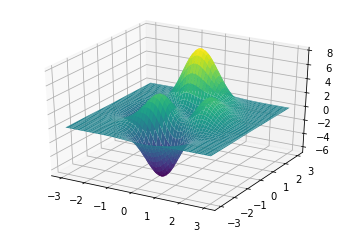

In [17]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



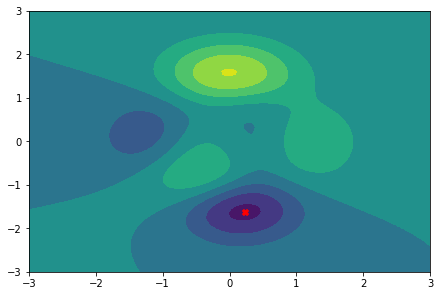

In [18]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

[ 0.93631252 -2.24643282]


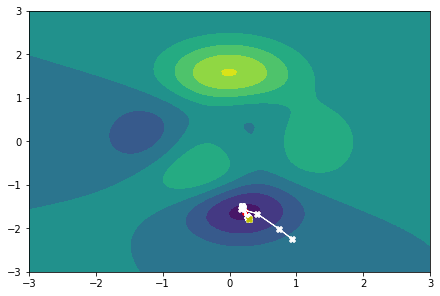

In [19]:
# put your solution here
from matplotlib.patches import FancyArrowPatch
from sympy import symbols, exp, diff, lambdify
point = np.random.uniform(-3,3,2)
eta = 0.07
a, b = symbols('a b', real=True)
f = 3*(1-a)**2 * exp(-(a**2) - (b+1)**2) - 10*(np.true_divide(a,5) - a**3 - b**5)*exp(-a**2 - b**2) - np.true_divide(1,3)*exp(-(a+1)**2 - b**2)
grad_a = diff(f,a)
grad_b = diff(f,b)
g_a = lambdify((a,b), grad_a)
g_b = lambdify((a,b), grad_b)
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
#plt.scatter(point[0], point[1],c='y',marker='X')
np0 = point[0]
np1 = point[1]
plt.scatter(0.23, -1.62,c='r',marker='X')
print(point)
for i in np.arange(100):
  plt.scatter(point[0], point[1],c='w',marker='X')  
  np0 -= eta*g_a(point[0],point[1])
  np1 -= eta*g_b(point[0],point[1])
  arrow = FancyArrowPatch((point[0],point[1]), (np0, np1), arrowstyle='simple',color='w')  
  ax.add_patch(arrow)
  point[0] = np0
  point[1] = np1
plt.scatter(point[0], point[1],c='y',marker='X')
plt.show()

good starting points: 1.04, -0.67 <br>
1.16, -1.7 <br>
-1.06, -1.49

### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


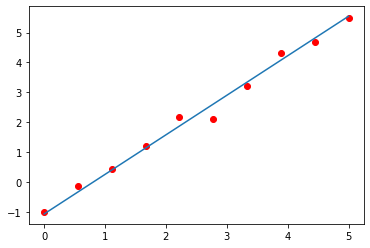

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()




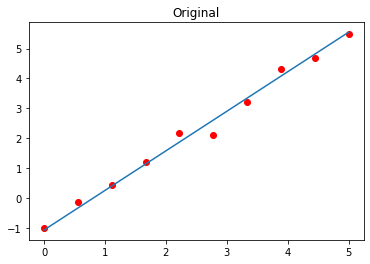

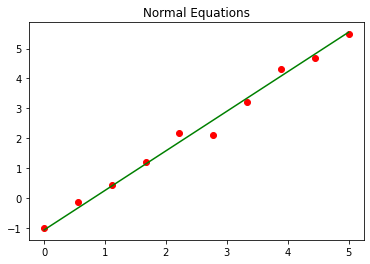

In [21]:
# put your code here
x_tilde = np.hstack((np.ones((len(x),1)),x.reshape(-1,1)))
m1 = np.matmul(x_tilde.T,x_tilde)
m2 = np.matmul(x_tilde.T,t.reshape(-1,1))

result = np.matmul(np.linalg.inv(m1),m2)
norm_eq = result[0] + result[1]*x

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.title('Original')
plt.show()

plt.scatter(x, tnoisy, c='r')
plt.title('Normal Equations')
plt.plot(x,norm_eq, color='g')
plt.show()


### Question 3 [5pts]. Successive orthogonalization

We once again consider the dataset from Question 2 but this time with 2 additional features $x_2$ and $x_3$ given below

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

Xtilde = np.vstack((np.ones((1, len(x))), x)) #feature meatrix
Xtilde = np.vstack((Xtilde, 2*x))
Xtilde = np.vstack((Xtilde, 4*x +1)).T

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,4)

t = beta_true[0] + beta_true[1]*Xtilde[:,0] + beta_true[2]*Xtilde[:,1] +\
beta_true[2]*Xtilde[:,2]

tnoisy = t+noise #project noisy vector on each orthogonal vector with weights beta


#### Question 3a [1pt] 

Using the linalg package from numpy, check the determinant of the matrix $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}$. What do you notice? 

In [23]:
det = np.linalg.det(np.matmul(Xtilde.T,Xtilde))
det


0.0

The determinant is 0 so the columns of the matrix are dependent and the matrix is not invertible

#### Question 3b [4pts]

We now want to rely on _successive orthogonalization_ to derive the regression coefficients $\mathbf{\beta} = [\beta_0, \beta_1,\ldots \beta_D]$ where $D=3$ of a linear model $y(x) = \beta_0 + \beta_1 x_1 + \ldots + \beta_D x_D$. 

Let $\tilde{\mathbf{X}}$ denote the feature matrix, with first column being the vector $[1,1,...,1]$, second column being the first feature $\mathbf{x}_1$, third column being the second feature $\mathbf{x}_2$ and so on.

Starting with $\mathbf{z}_0 = \mathbf{x}_0$ (the first column of $\tilde{\mathbf{X}}$), successive orthogonalization of the columns $\mathbf{x}_j$ of $\tilde{\mathbf{X}}$ can be encoded as follows

1. Initialize $\mathbf{z}_0 = \mathbf{x}_0 = [1,1,\ldots, 1]^T$



2. For j=1,2,..., D

  Compute the coefficient $\hat{\gamma}_{\ell,j}$ for $\ell=0,..., j-1$ as
     
  $$\hat{\gamma}_{\ell, j} = \frac{\langle \mathbf{z}_\ell, \mathbf{x}_j\rangle }{\langle \mathbf{z}_\ell, \mathbf{z}_\ell\rangle}$$
    
  And define the new column $\mathbf{z}_j$ as 
    
  $$\mathbf{z}_j = \mathbf{x}_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj}\mathbf{z}_k\quad \quad (*)$$


Once we have all the $\mathbf{z}_j's$ we can compute the projection of the (noisy) target vector $\mathbf{t}_{\varepsilon}$ ('t_noisy') onto each $\mathbf{z}_j$ as 
$\alpha_j = \langle \mathbf{z}_j, \mathbf{t}_{\varepsilon}\rangle/\langle\mathbf{z}_j,\mathbf{z}_j \rangle$

This then gives us a regression model on the $\mathbf{z}_j$:

\begin{align*}
y(\mathbf{z}) = \alpha_0 + \alpha_1 z_1 + \ldots + \alpha_D z_D 
\end{align*}

where each $z_j$ is a function of the original features (given by the recursion $(*)$)


What we want however is a linear model _on the original features $x_j$_ (not the $z_j$)

Since the $\mathbf{z}_{D}$ is the only $\mathbf{z}_j$ that contains $\mathbf{c}_{D}$, $\beta_{D}$ is given directly from $\alpha_D$ (i.e. $\beta_D = \alpha_D$) 

$$\beta_{D} = \alpha_D =   \frac{\langle \mathbf{z}_{D}, \mathbf{t}_{\varepsilon}\rangle }{\langle\mathbf{z}_{D},\mathbf{z}_{D} \rangle} $$

The remaining $\beta_j$ can be derived by using the recursion (*) on the $\mathbf{z}_j$, projecting the target vector $\mathbf{t}_{\varepsilon}$ on $\mathbf{z}_j$ and expressing $\mathbf{z}_j$ from the recursion as a linear combination of the $\mathbf{c}_j$

Implement successive orthogonalization on the $3$ feature matrix given above and returns the vector of regression weights $\mathbf{\beta}$. 

In [24]:
Xtilde

array([[ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.55555556,  1.11111111,  3.22222222],
       [ 1.        ,  1.11111111,  2.22222222,  5.44444444],
       [ 1.        ,  1.66666667,  3.33333333,  7.66666667],
       [ 1.        ,  2.22222222,  4.44444444,  9.88888889],
       [ 1.        ,  2.77777778,  5.55555556, 12.11111111],
       [ 1.        ,  3.33333333,  6.66666667, 14.33333333],
       [ 1.        ,  3.88888889,  7.77777778, 16.55555556],
       [ 1.        ,  4.44444444,  8.88888889, 18.77777778],
       [ 1.        ,  5.        , 10.        , 21.        ]])

In [25]:
z=np.copy(Xtilde)

D = z.shape[0]
f = z.shape[1]
print('Degree:',D,'\nFeatures:',f)
recur = np.zeros(4)

for j in np.arange(1,f):
  for l in np.arange(j):
    if np.dot(z[:,l],z[:,l]) > 1e-10:
      recur[j] += np.divide(np.dot(z[:,l],Xtilde[:,j]),np.dot(z[:,l],z[:,l]))
      z[:,j] -= z[:,l]*np.divide(np.dot(z[:,l],Xtilde[:,j]),np.dot(z[:,l],z[:,l]))

z = np.round_(z,10)
print(recur)
z

Degree: 10 
Features: 4
[ 0.   2.5  7.  15. ]


array([[ 1.        , -2.5       ,  0.        ,  0.        ],
       [ 1.        , -1.94444444,  0.        ,  0.        ],
       [ 1.        , -1.38888889,  0.        ,  0.        ],
       [ 1.        , -0.83333333,  0.        ,  0.        ],
       [ 1.        , -0.27777778,  0.        ,  0.        ],
       [ 1.        ,  0.27777778, -0.        , -0.        ],
       [ 1.        ,  0.83333333, -0.        , -0.        ],
       [ 1.        ,  1.38888889, -0.        , -0.        ],
       [ 1.        ,  1.94444444, -0.        , -0.        ],
       [ 1.        ,  2.5       , -0.        , -0.        ]])

In [26]:
a = np.zeros(4)
for j in np.arange(0,f):#dot product ratio
  a[j] = np.divide(np.dot(z[:,j],tnoisy),np.dot(z[:,j],z[:,j]))

a[np.isnan(a)]=0
a #alpha weights

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([-1.62971914, -0.51514245,  0.        ,  0.        ])

In [42]:
gamma_mat = np.zeros((4,4))
for j in np.arange(4):
  for l in np.arange(j):
    gamma_mat[j,l] = np.divide(np.dot(z[:,l],Xtilde[:,j]),np.dot(z[:,l],z[:,l]))
  gamma_mat[j,j] = 1

gamma_mat[np.isnan(gamma_mat)] = 0

#print(gamma_mat)
betas = np.matmul(a,gamma_mat)
print('The betas are', betas)

The betas are [-2.91757527 -0.51514245  0.          0.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
